In [1]:
import numpy as np
import matplotlib.pyplot as plt

#load data from file
def load_data(filename):
    data = []
    file = open(filename)
    for line in file.readlines():
        lineArr = line.strip().split(',')
        col_num = len(lineArr)
        temp = []
        for i in xrange(col_num):
            temp.append(float(lineArr[i]))
        data.append(temp)
    return np.array(data)

    
data = load_data('ex2data2.txt')
print data.shape
print data[:5]

X = data[:,:-1]
y = data[:,-1:]
print X.shape
print y.shape
print X[:5]
print y[:5]



(118L, 3L)
[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]]
(118L, 2L)
(118L, 1L)
[[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]


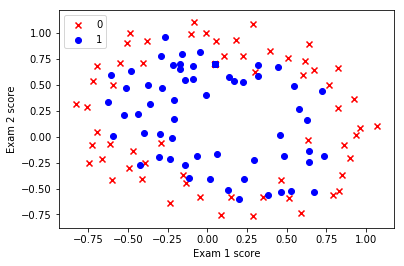

In [2]:
import matplotlib.pyplot as plt
label0 = np.where(y == 0)
plt.scatter(X[label0,0],X[label0,1],marker='x',color = 'r',label = '0')
label1 = np.where(y == 1)
plt.scatter(X[label1,0],X[label1,1],marker='o',color = 'b',label = '1')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc = 'upper left')
plt.show()


In [3]:
#add polynomial features to our data matrix (similar to polynomial regression).
def mapFeature(X1,X2):
    degree = 6
    out = np.ones((X1.shape[0],1))
    end = 0
    for i in np.arange(1,degree+1,1):
        for j in np.arange(0,i+1,1):
           temp = X1**(i-j) * X2**(j)
           out = np.hstack((out,temp))
    return out

#regularized logistic
def sigmoid(x):
    return 1 / (1+np.exp(-x))
def out(x,w):
    return sigmoid(np.dot(x,w))

def cost_reg(theta,XX,yy,reg):
    m = XX.shape[0]
    J = 0
    grad = np.zeros((XX.shape[1],1))
    h = out(XX,theta)
    theta_1 = theta[1:,:]
    J = -1*np.sum(yy*np.log(h) + (1-yy)*np.log((1-h))) / m + 0.5 * reg * theta_1.T.dot(theta_1) / m
    grad = XX.T.dot((h-yy)) / m 
    grad[1:,:] += reg*theta_1/m  #theta0 without reg
    return J,grad

X1=data[:,0:1]
X2=data[:,1:2]
print X1.shape,X2.shape
X_map = mapFeature(X1,X2)
print X_map.shape
initial_theta = np.zeros((X_map.shape[1],1))
reg = 1

cost,grad = cost_reg(initial_theta,X_map,y,reg)
print 'Cost at initial theta (zeros)=0.693'
print cost
print '0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n'
print grad[:5]

test_theta = np.ones((X_map.shape[1],1)) 
cost1,grad1 =cost_reg(test_theta,X_map,y,10)
print 'cost=3.16'
print cost1


(118L, 1L) (118L, 1L)
(118L, 28L)
Cost at initial theta (zeros)=0.693
[[ 0.69314718]]
0.0085
 0.0188
 0.0001
 0.0503
 0.0115

[[  8.47457627e-03]
 [  1.87880932e-02]
 [  7.77711864e-05]
 [  5.03446395e-02]
 [  1.15013308e-02]]
cost=3.16
[[ 3.16450933]]


In [4]:
def bgd(X_train,y_train,theta,alpha = 0.1,iters = 5000,reg = 1):
    J_history = []
    for i in xrange(iters):
        cost,grad = cost_reg(theta,X_train,y_train,reg)
        theta = theta - alpha * grad
        J_history.append(float(cost))
        if i%200 == 0:
            print 'iter=%d,cost=%f '%(i,cost)
    return theta,J_history

W = 0.001*np.random.randn(X_map.shape[1],1).reshape((-1,1))
theta,J_history = bgd(X_map,y,W)

    

iter=0,cost=0.692881 
iter=200,cost=0.596391 
iter=400,cost=0.562767 
iter=600,cost=0.546812 
iter=800,cost=0.538705 
iter=1000,cost=0.534415 
iter=1200,cost=0.532078 
iter=1400,cost=0.530777 
iter=1600,cost=0.530040 


iter=1800,cost=0.529616 
iter=2000,cost=0.529370 
iter=2200,cost=0.529225 
iter=2400,cost=0.529138 
iter=2600,cost=0.529086 
iter=2800,cost=0.529055 


iter=3000,cost=0.529035 
iter=3200,cost=0.529023 
iter=3400,cost=0.529016 
iter=3600,cost=0.529011 
iter=3800,cost=0.529008 

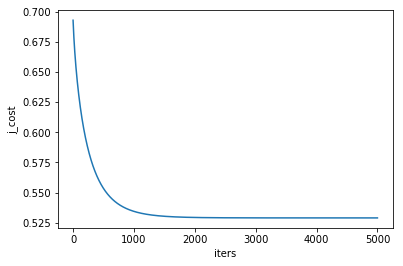

In [5]:
import matplotlib.pyplot as plt
plt.plot(J_history)
plt.xlabel('iters')
plt.ylabel('j_cost')
plt.show()





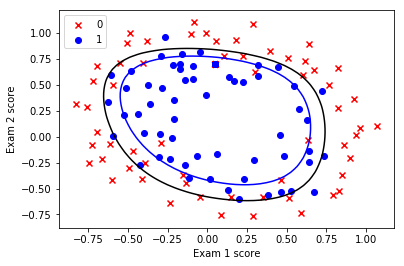

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
#plot the scatter
label0 = np.where(y == 0)
plt.scatter(X[label0,0],X[label0,1],marker='x',color = 'r',label = '0')
label1 = np.where(y == 1)
plt.scatter(X[label1,0],X[label1,1],marker='o',color = 'b',label = '1')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc = 'upper left')
#plot the boundary
poly = PolynomialFeatures(6)
x1Min = X[:, 0].min()
x1Max = X[:, 0].max()
x2Min = X[:, 1].min()
x2Max = X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1Min, x1Max),np.linspace(x2Min, x2Max))
h1 = poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(theta)
h2 = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(theta)) #boundary
h1 = h1.reshape(xx1.shape)
h2 = h2.reshape(xx1.shape)
plt.contour(xx1, xx2, h1, [0.5], colors='b', linewidth=.5)
plt.contour(xx1, xx2, h2, [0.5], colors='black', linewidth=.5)
plt.show()


